In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\housing price prediction\Housing.csv")

In [5]:
x=df.drop(columns='price')
y=df['price']

In [6]:
cate_col=x.select_dtypes(include='dtype').columns.tolist()

In [7]:
preprocessor=ColumnTransformer(
    transformers=[("cat",OneHotEncoder(drop='first'),cate_col)],
    remainder='passthrough'
)

In [8]:
pipeline=Pipeline([
     ("preprocess",preprocessor),
     ('model',LinearRegression())
])

In [9]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
pipeline.fit(x_train,y_train)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('model', LinearRegression())])

In [11]:
y_pred=pipeline.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2s=r2_score(y_test,y_pred)
print(f"mean_absolute_error:{mae:.2f}")
print(f"mean_squared_error:{mse:.2f}")
print(f"r2_score:{r2s:.2f}")

mean_absolute_error:970043.40
mean_squared_error:1754318687330.67
r2_score:0.65


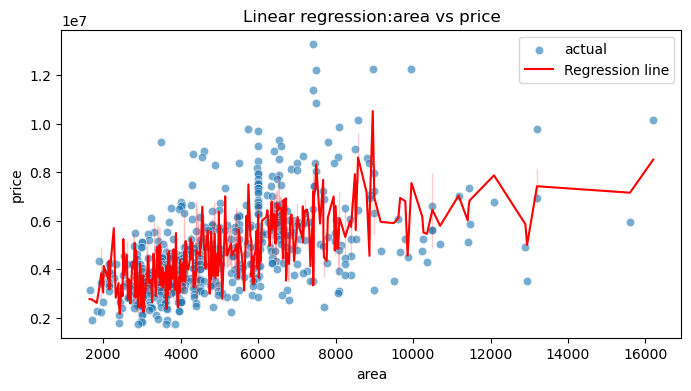

In [16]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=x['area'],y=y,label="actual",alpha=0.6)
sns.lineplot(x=x['area'],y=pipeline.predict(x),color="red",label='Regression line')
plt.xlabel("area")
plt.ylabel("price")
plt.title("Linear regression:area vs price")
plt.legend()
plt.show()

In [27]:
model=pipeline.named_steps['model']
features=pipeline.named_steps["preprocess"].get_feature_names_out()
coefficient=pd.Series(model.coef_,index=features)
print(coefficient)

cat__mainroad_yes                       3.679199e+05
cat__guestroom_yes                      2.316100e+05
cat__basement_yes                       3.902512e+05
cat__hotwaterheating_yes                6.846499e+05
cat__airconditioning_yes                7.914267e+05
cat__prefarea_yes                       6.298906e+05
cat__furnishingstatus_semi-furnished   -1.268818e+05
cat__furnishingstatus_unfurnished      -4.136451e+05
remainder__area                         2.359688e+02
remainder__bedrooms                     7.677870e+04
remainder__bathrooms                    1.094445e+06
remainder__stories                      4.074766e+05
remainder__parking                      2.248419e+05
dtype: float64
